# Homework 6. KNN - Handwritten digits

***Double Click here to edit this cell***

- Name: 조성현 
- Student ID: 201803430 
- Submission date: 22.06.10

### We have 1797 handwritten digits of size 8x8 

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [2]:
digits.target.shape

(1797,)

### Try with some handwritten images

Target is 0
Data is :

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

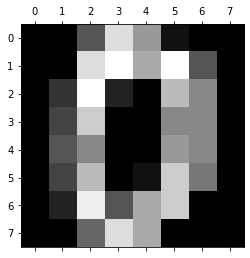

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt 

k = 0
print('Target is {}'.format(digits.target[k]))
print('Data is :\n')
print(digits.data[k].reshape(8,8))
plt.gray()
plt.matshow(digits.images[k]) 
plt.show() 


# Problem 1 (30 pts)

- We want to classify handwritten digits using **k nearest neighbor classifier**

## STEP 1

- import whatever you need
- you must set "random_state=0"" in "train_test_split"
- don't modify the random number seed (random_state)
- Split the data into training dataset (0.67 of the total data), test dataset(0.33 of the total data)

In [25]:
from sklearn.model_selection import train_test_split
x = digits.data
y = digits.target
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state =0,stratify = y)
print(x_train.shape)
print(x_test.shape)

(1203, 64)
(594, 64)


## STEP 2

- Use sklearn k nearest neighbor classifier to classify digits
- Print confusion matrix, classification report, accuracy
- This homework will be graded based on **accuracy**

In [44]:
# YOUR CODE HERE
from sklearn.neighbors import KNeighborsTransformer, KNeighborsClassifier    
knn = KNeighborsClassifier(n_neighbors =1)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_test,y_pred=y_pred)
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)



accuracy = knn.score(x_test,y_test)

print('confusion matrix : \n')
print(cm)
print('\n\nclassification_report : \n')
print(cr)
print('Average accuracy = {:.2f}%'.format(accuracy*100))

confusion matrix : 

[[59  0  0  0  0  0  0  0  0  0]
 [ 0 60  0  0  0  0  0  0  0  0]
 [ 0  0 59  0  0  0  0  0  0  0]
 [ 0  0  0 59  0  0  0  1  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 60  0  0  0  0]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 59  0  0]
 [ 0  2  0  0  0  0  0  0 54  2]
 [ 0  0  0  3  0  1  0  0  0 55]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.97      1.00      0.98        60
           2       1.00      1.00      1.00        59
           3       0.95      0.98      0.97        60
           4       1.00      1.00      1.00        60
           5       0.98      1.00      0.99        60
           6       1.00      1.00      1.00        60
           7       0.98      1.00      0.99        59
           8       1.00      0.93      0.96        58
           9       0.96      0.93      0.95        59

    accuracy            

My result:
```
confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 64  0]
 [ 0  0  0  3  0  1  0  0  0 58]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        62
           3       0.93      1.00      0.96        55
           4       1.00      1.00      1.00        50
           5       0.98      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        56
           8       1.00      0.96      0.98        67
           9       0.98      0.94      0.96        62

    accuracy                           0.98       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.98      0.98       594

Average accuracy = 98.48%
```

## State-of-the-Art of MNIST classification: 99.79%

- https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html
- MNIST dataset is much bigger dataset: 60,000 training images and 10,000 testing images

# Problem 2 (30 pts)

- If you choose any hyperparameters and you did any transformation in your data, justify your choice and transformation.
- The justification must be code, data, or plotted images, **not your guess!!!**
- This must be a longer code. 
- Use plotted image whenever possible.
- You may add as many cells as you want.
- To add a cell, insert->insert cell or click '+' button above in the notebook.
- you must set "random_state=0"" in "train_test_split", "TSNE" or on any functions based on random numbers

In [78]:
# ADD YOUR CELL
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state =0,stratify = y)
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    print('k: %d, accuracy: %.2f' % (k, score*100))

    
# case, k  == 1 is best accuracy at problem 1 without reduce demnsion

k: 1, accuracy: 98.48
k: 2, accuracy: 98.32
k: 3, accuracy: 98.32
k: 4, accuracy: 98.15
k: 5, accuracy: 98.32
k: 6, accuracy: 97.81
k: 7, accuracy: 97.64
k: 8, accuracy: 97.64
k: 9, accuracy: 97.64
k: 10, accuracy: 97.64


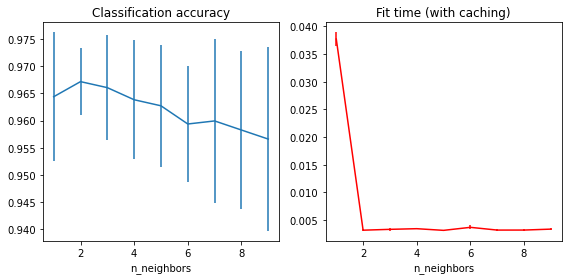

In [75]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from tempfile import TemporaryDirectory
from sklearn.neighbors import KNeighborsTransformer, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

X, y = load_digits(return_X_y=True)
n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]

graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list), mode="distance")
classifier_model = KNeighborsClassifier(metric="precomputed")

with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(steps=[("graph", graph_model), ("classifier", classifier_model)], memory=tmpdir)
    param_grid = {"classifier__n_neighbors": n_neighbors_list}
    grid_model = GridSearchCV(full_model, param_grid)
    grid_model.fit(X, y)


fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].errorbar(x=n_neighbors_list,   y=grid_model.cv_results_["mean_test_score"],
                 yerr=grid_model.cv_results_["std_test_score"],)
axes[0].set(xlabel="n_neighbors", 
            title="Classification accuracy")
axes[1].errorbar(x=n_neighbors_list,y=grid_model.cv_results_["mean_fit_time"],
                 yerr=grid_model.cv_results_["std_fit_time"],
    color="r",
)

axes[1].set(xlabel="n_neighbors", title="Fit time (with caching)")

fig.tight_layout()

plt.show()


In [119]:
# not good
x = digits.data
y = digits.target
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state =0,stratify = y)


for i in range(1,40):
    pca = make_pipeline(StandardScaler(), PCA(n_components=i, random_state=0))
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Make a list of the methods to be compared
    dim_reduction_methods = [("PCA", pca)]
    model =pca.fit(x_train,y_train)
    knn.fit(model.transform(x_train),y_train)
    accuracy = knn.score(model.transform(x_test), y_test)
    print('Average accuracy = {:.2f}%'.format(accuracy*100))

Average accuracy = 28.96%
Average accuracy = 52.36%
Average accuracy = 70.54%
Average accuracy = 79.63%
Average accuracy = 84.68%
Average accuracy = 86.20%
Average accuracy = 89.39%
Average accuracy = 90.91%
Average accuracy = 91.92%
Average accuracy = 92.93%
Average accuracy = 93.94%
Average accuracy = 94.28%
Average accuracy = 94.44%
Average accuracy = 96.63%
Average accuracy = 96.30%
Average accuracy = 96.30%
Average accuracy = 96.30%
Average accuracy = 96.63%
Average accuracy = 96.63%
Average accuracy = 96.80%
Average accuracy = 97.14%
Average accuracy = 96.63%
Average accuracy = 96.80%
Average accuracy = 96.63%
Average accuracy = 96.46%
Average accuracy = 96.46%
Average accuracy = 96.80%
Average accuracy = 96.63%
Average accuracy = 96.63%
Average accuracy = 96.63%
Average accuracy = 96.46%
Average accuracy = 96.63%
Average accuracy = 96.13%
Average accuracy = 96.46%
Average accuracy = 96.46%
Average accuracy = 96.30%
Average accuracy = 96.63%
Average accuracy = 96.46%
Average accu

In [127]:
# tsne를 이용한 차원 축소 후 적용
from sklearn.datasets import load_digits
digits = load_digits()

import pandas as pd
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
x = digits.data
y = digits.target


In [128]:
result = []
tmp = []


for j in range(1,4):
    tsne_np = TSNE(n_components = j,random_state = 0).fit_transform(x)
    x_train,x_test ,y_train,y_test = train_test_split(tsne_np,y,test_size = 0.33,random_state =0,stratify = y)
    for i in range(1,10):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train,y_train)
        y_pred = knn.predict(x_test)
        accuracy = knn.score(x_test,y_test)
        tmp.append('Average accuracy = {:.2f}%'.format(accuracy*100))
    result.append(tmp)
    tmp=[]
# Average accuracy 98.82 %

In [130]:
pd.DataFrame(result)

,0,1,2,3,4,5,6,7,8
0,Average accuracy = 97.64%,Average accuracy = 98.15%,Average accuracy = 98.65%,Average accuracy = 98.48%,Average accuracy = 98.48%,Average accuracy = 98.48%,Average accuracy = 98.48%,Average accuracy = 98.48%,Average accuracy = 98.48%
1,Average accuracy = 98.65%,Average accuracy = 98.82%,Average accuracy = 98.48%,Average accuracy = 98.15%,Average accuracy = 98.15%,Average accuracy = 98.15%,Average accuracy = 98.15%,Average accuracy = 98.15%,Average accuracy = 98.15%
2,Average accuracy = 99.16%,Average accuracy = 98.82%,Average accuracy = 98.99%,Average accuracy = 98.65%,Average accuracy = 98.65%,Average accuracy = 98.65%,Average accuracy = 98.65%,Average accuracy = 98.65%,Average accuracy = 98.65%


In [126]:
# 결론

from sklearn.neighbors import KNeighborsTransformer, KNeighborsClassifier    
knn = KNeighborsClassifier(n_neighbors =1)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_test,y_pred=y_pred)
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)



accuracy = knn.score(x_test,y_test)

print('confusion matrix : \n')
print(cm)
print('\n\nclassification_report : \n')
print(cr)
print('Average accuracy = {:.2f}%'.format(accuracy*100))

confusion matrix : 

[[59  0  0  0  0  0  0  0  0  0]
 [ 0 59  0  0  0  0  0  0  1  0]
 [ 0  0 59  0  0  0  0  0  0  0]
 [ 0  0  0 59  0  0  0  1  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 60  0  0  0  0]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 59  0  0]
 [ 0  2  0  0  0  0  0  0 56  0]
 [ 0  0  0  1  0  0  0  0  0 58]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.97      0.98      0.98        60
           2       1.00      1.00      1.00        59
           3       0.98      0.98      0.98        60
           4       1.00      1.00      1.00        60
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        60
           7       0.98      1.00      0.99        59
           8       0.98      0.97      0.97        58
           9       1.00      0.98      0.99        59

    accuracy            

- This is my result. 

```
confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 61  1  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  0  0  0  0  0 65  0]
 [ 0  0  0  1  0  0  0  0  0 61]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      0.98      0.99        62
           3       0.96      1.00      0.98        55
           4       1.00      1.00      1.00        50
           5       1.00      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        56
           8       1.00      0.97      0.98        67
           9       0.98      0.98      0.98        62

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594

Average accuracy = 98.99%
```


### Written justification for your hyperparameter choice and data transformation

- WRITE HERE (To edit, double click this cell)
          tsne 를 이용한 3차원으로 축소 이후  knn 에서 k = 1를 사용여 99.16% 의 정확성을 찾았으며 이는 가장 높다. 



## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit

- Run **all cells** after restarting the kernel
- Goto "File -> Print Preview"
- Print the page as pdf
- Pdf file name must be in a form of: homework_6_홍길동_202200001.pdf
- Submit the pdf file in google classroom
- No late homeworks will be accepted
- Your homework will be graded on the basis of correctness and programming skills